## 美国128城市交通关系无向图可视化

[参考文档](https://networkx.org/documentation/stable/auto_examples/drawing/plot_knuth_miles.html#sphx-glr-auto-examples-drawing-plot-knuth-miles-py)

[数据集下载](https://github.com/networkx/networkx/blob/main/examples/drawing/knuth_miles.txt.gz)

In [1]:
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
import gzip
import re
import warnings

warnings.simplefilter('ignore')

构建图

In [3]:
fh = gzip.open('data/knuth_miles.txt.gz', 'r')

G = nx.Graph()
G.position = {}
G.population = {}

In [4]:
cities = []
for line in fh.readlines():
    line = line.decode()
    if line.startswith('*'):    # 其他行 跳过
        continue

    num_find = re.compile(r"^\d+")

    if num_find.match(line):    # 记录城市间距离的行
        dist = line.split()
        for d in dist:
            G.add_edge(city, cities[i], weight=int(d))
            i = i + 1
    else:   # 记录城市维度、人口的行
        i = 1
        (city, coordpop) = line.split('[')
        cities.insert(0, city)
        (coord, pop) = coordpop.split(']')
        (y, x) = coord.split(',')

        G.add_node(city)
        # assign position - Convert string to lat/long
        x = -float(x) / 100
        y = float(y) / 100
        G.position[city] = (x, y)
        pop = float(pop) / 1000
        G.population[city] = pop

查看图

In [5]:
print(G)

Graph with 128 nodes and 8128 edges


In [6]:
G.nodes

NodeView(('Youngstown, OH', 'Yankton, SD', 'Yakima, WA', 'Worcester, MA', 'Wisconsin Dells, WI', 'Winston-Salem, NC', 'Winnipeg, MB', 'Winchester, VA', 'Wilmington, NC', 'Wilmington, DE', 'Williston, ND', 'Williamsport, PA', 'Williamson, WV', 'Wichita Falls, TX', 'Wichita, KS', 'Wheeling, WV', 'West Palm Beach, FL', 'Wenatchee, WA', 'Weed, CA', 'Waycross, GA', 'Wausau, WI', 'Waukegan, IL', 'Watertown, SD', 'Watertown, NY', 'Waterloo, IA', 'Waterbury, CT', 'Washington, DC', 'Warren, PA', 'Walla Walla, WA', 'Waco, TX', 'Vincennes, IN', 'Victoria, TX', 'Vicksburg, MS', 'Vancouver, BC', 'Valley City, ND', 'Valdosta, GA', 'Utica, NY', 'Uniontown, PA', 'Tyler, TX', 'Twin Falls, ID', 'Tuscaloosa, AL', 'Tupelo, MS', 'Tulsa, OK', 'Tucson, AZ', 'Trinidad, CO', 'Trenton, NJ', 'Traverse City, MI', 'Toronto, ON', 'Topeka, KS', 'Toledo, OH', 'Texarkana, TX', 'Terre Haute, IN', 'Tampa, FL', 'Tallahassee, FL', 'Tacoma, WA', 'Syracuse, NY', 'Swainsboro, GA', 'Sumter, SC', 'Stroudsburg, PA', 'Stockton, 

128城市经纬度坐标

In [7]:
G.position

{'Youngstown, OH': (-80.65, 41.1),
 'Yankton, SD': (-97.39, 42.88),
 'Yakima, WA': (-120.51, 46.6),
 'Worcester, MA': (-71.8, 42.27),
 'Wisconsin Dells, WI': (-89.77, 43.63),
 'Winston-Salem, NC': (-80.25, 36.1),
 'Winnipeg, MB': (-97.15, 49.88),
 'Winchester, VA': (-78.16, 39.19),
 'Wilmington, NC': (-77.92, 34.24),
 'Wilmington, DE': (-75.55, 39.75),
 'Williston, ND': (-103.62, 48.15),
 'Williamsport, PA': (-77.0, 41.25),
 'Williamson, WV': (-82.28, 37.68),
 'Wichita Falls, TX': (-98.49, 33.9),
 'Wichita, KS': (-97.34, 37.69),
 'Wheeling, WV': (-80.72, 40.07),
 'West Palm Beach, FL': (-80.05, 26.72),
 'Wenatchee, WA': (-120.32, 47.42),
 'Weed, CA': (-122.39, 41.42),
 'Waycross, GA': (-82.35, 31.22),
 'Wausau, WI': (-89.64, 44.96),
 'Waukegan, IL': (-87.83, 42.36),
 'Watertown, SD': (-97.11, 44.9),
 'Watertown, NY': (-75.92, 43.98),
 'Waterloo, IA': (-92.34, 42.5),
 'Waterbury, CT': (-73.05, 41.55),
 'Washington, DC': (-77.03, 38.89),
 'Warren, PA': (-79.14, 41.85),
 'Walla Walla, WA'

128城市人口数据

In [8]:
G.population

{'Youngstown, OH': 115.436,
 'Yankton, SD': 12.011,
 'Yakima, WA': 49.826,
 'Worcester, MA': 161.799,
 'Wisconsin Dells, WI': 2.521,
 'Winston-Salem, NC': 131.885,
 'Winnipeg, MB': 564.473,
 'Winchester, VA': 20.217,
 'Wilmington, NC': 139.238,
 'Wilmington, DE': 70.195,
 'Williston, ND': 13.336,
 'Williamsport, PA': 33.401,
 'Williamson, WV': 5.219,
 'Wichita Falls, TX': 94.201,
 'Wichita, KS': 279.835,
 'Wheeling, WV': 43.07,
 'West Palm Beach, FL': 63.305,
 'Wenatchee, WA': 17.257,
 'Weed, CA': 2.879,
 'Waycross, GA': 19.371,
 'Wausau, WI': 32.426,
 'Waukegan, IL': 67.653,
 'Watertown, SD': 15.649,
 'Watertown, NY': 27.861,
 'Waterloo, IA': 75.985,
 'Waterbury, CT': 103.266,
 'Washington, DC': 638.432,
 'Warren, PA': 12.146,
 'Walla Walla, WA': 25.618,
 'Waco, TX': 101.261,
 'Vincennes, IN': 20.857,
 'Victoria, TX': 50.695,
 'Vicksburg, MS': 25.434,
 'Vancouver, BC': 414.281,
 'Valley City, ND': 7.774,
 'Valdosta, GA': 37.596,
 'Utica, NY': 75.632,
 'Uniontown, PA': 14.51,
 'Tyler, 

128城市互联互通关系

In [9]:
G.edges

EdgeView([('Youngstown, OH', 'Yankton, SD'), ('Youngstown, OH', 'Yakima, WA'), ('Youngstown, OH', 'Worcester, MA'), ('Youngstown, OH', 'Wisconsin Dells, WI'), ('Youngstown, OH', 'Winston-Salem, NC'), ('Youngstown, OH', 'Winnipeg, MB'), ('Youngstown, OH', 'Winchester, VA'), ('Youngstown, OH', 'Wilmington, NC'), ('Youngstown, OH', 'Wilmington, DE'), ('Youngstown, OH', 'Williston, ND'), ('Youngstown, OH', 'Williamsport, PA'), ('Youngstown, OH', 'Williamson, WV'), ('Youngstown, OH', 'Wichita Falls, TX'), ('Youngstown, OH', 'Wichita, KS'), ('Youngstown, OH', 'Wheeling, WV'), ('Youngstown, OH', 'West Palm Beach, FL'), ('Youngstown, OH', 'Wenatchee, WA'), ('Youngstown, OH', 'Weed, CA'), ('Youngstown, OH', 'Waycross, GA'), ('Youngstown, OH', 'Wausau, WI'), ('Youngstown, OH', 'Waukegan, IL'), ('Youngstown, OH', 'Watertown, SD'), ('Youngstown, OH', 'Watertown, NY'), ('Youngstown, OH', 'Waterloo, IA'), ('Youngstown, OH', 'Waterbury, CT'), ('Youngstown, OH', 'Washington, DC'), ('Youngstown, OH', '

纽约到里士满的交通距离

In [10]:
G.edges[('Rochester, NY', 'Richmond, VA')]

{'weight': 486}

筛选出距离小于指定阈值的城市

In [11]:
H = nx.Graph()
for v in G:
    H.add_node(v)

for (u, v, d) in G.edges(data=True):
    if d['weight'] < 800:
        H.add_edge(u, v)

可视化

In [12]:
# 节点颜色-节点度
node_color = [float(H.degree(v)) for v in H]

# 节点尺寸-节点人口
node_size = [G.population[v] for v in H]

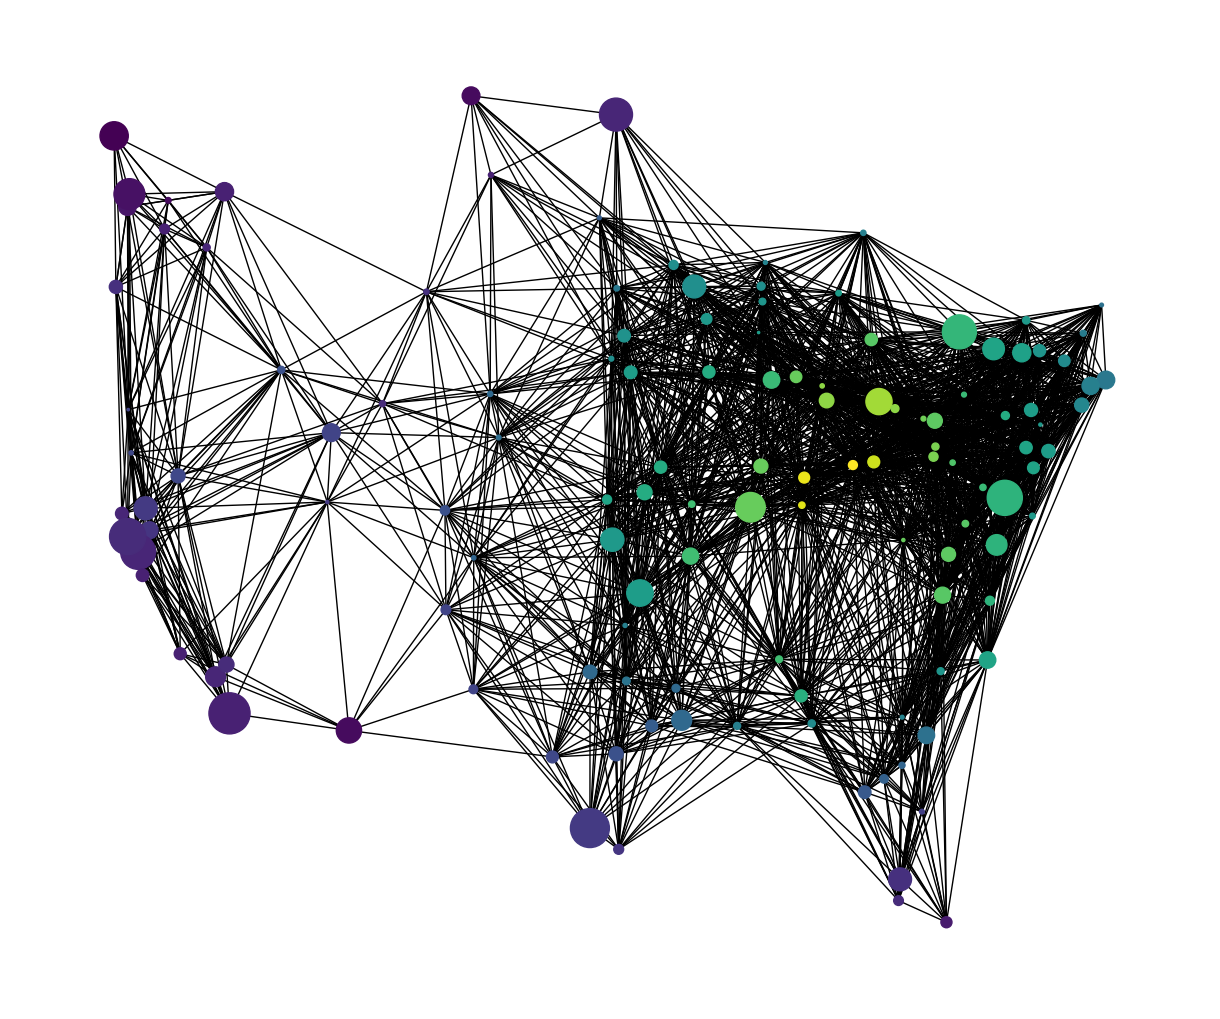

In [13]:
fig = plt.figure(figsize=(12, 10))
nx.draw(
    H,
    G.position,
    node_size=node_size,
    node_color=node_color,
    with_labels=False
)
plt.show()